In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"]

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

folder = '/media/raphael/PortableSSD/diploma_thesis/Data'

In [45]:
from matplotlib.ticker import AutoMinorLocator
def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    if ax.get_legend() != None:
        ax.get_legend().set_title("")
        ax.get_legend().set(alpha = 0, frame_on=False)
    return ax

In [46]:
f = result().read(f"{folder}/5. Plasmid-mediated degradation does not get affected by Inhibition of Autophagy/Flourometry/Results.csv")
print(f.df)
f.summarize(values = "Mean_norm_X",groups = ["Group2","Group1"]).round(2).head(10)

     Unnamed: 0     Mean        StDev      1;2      2;1      2;2      2;3  \
0             0  36806.6  9522.145205  33569.0  41407.0  51179.0  28358.0   
1             1  35462.4  4664.530019  39797.0  33716.0  30210.0  40921.0   
2             2  19071.8   262.601790  19379.0  18797.0  19252.0  18806.0   
3             3  24196.6  3122.480953  26311.0  20400.0  26177.0  26889.0   
4             4  27644.8  3839.420230  29109.0  29416.0  32284.0  22947.0   
..          ...      ...          ...      ...      ...      ...      ...   
127         127  23453.8  5589.814997  23442.0  22803.0  30999.0  24700.0   
128         128  10239.4  1759.222357   8948.0  12481.0   9062.0   8891.0   
129         129  11460.0  1406.745890  10888.0  13230.0   9996.0  10526.0   
130         130  13424.8  2913.586141  16499.0  16363.0  10987.0  12968.0   
131         131  14603.6  3314.616614  17992.0  16758.0  10405.0  16087.0   

         3;2 Group1 Group2  ... Bradford_norm_X Mean_norm_DMSO  \
0    2952

mean    sd  ci_lo  ci_hi  count
Group2 Group1                                 
DMSO   X       1.00  0.38   0.81   1.19     16
       TP      0.53  0.16   0.46   0.61     16
       FY      0.64  0.29   0.51   0.78     16
CQ     X       1.00  0.38   0.84   1.22     16
       TP      0.56  0.26   0.43   0.69     16
       FY      0.67  0.53   0.43   0.96     16
BAF    X       1.00  0.27   0.85   1.15     12
       TP      0.60  0.16   0.51   0.69     12
       FY      0.95  0.67   0.60   1.35     12

In [47]:
f.create_p_table().round(decimals=4).head(10)

/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:87: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:88: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:112: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  p_table.stack(p_table.index.names)


Group2 Group1       p  star
Group2 Group1                            
DMSO   X        DMSO     TP  0.0001  ****
       X        DMSO     FY  0.0031    **
CQ     X          CQ     TP  0.0004   ***
       X          CQ     FY  0.0309     *
BAF    X         BAF     TP  0.0002   ***
       X         BAF     FY  0.4018    ns

/tmp/ipykernel_9558/16156459.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])
/tmp/ipykernel_9558/16156459.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])
/tmp/ipykernel_9558/16156459.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


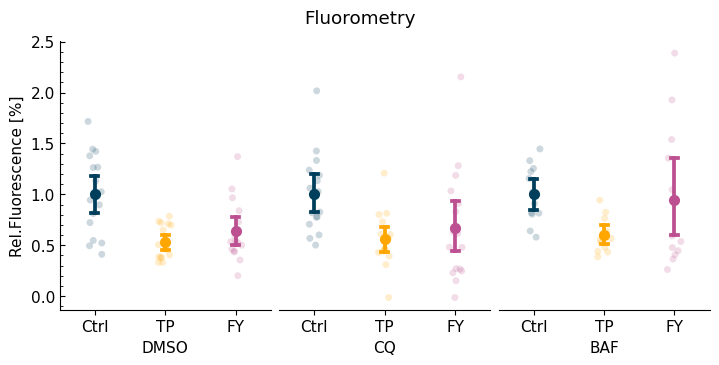

In [63]:


def prettify_pointplot(ax):
    ax.tick_params(bottom = True)
    return ax

def pointplot(data, 
                x=None, 
                y=None ,
                hue = None,
                ax=None, 
                y_scale = 1,
                rm_outliers = False,
                thin = 1,
                jitter = 0.2,
                d_bool = False,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                **kwargs):
    if x == hue:
        d_bool = False
        dodge = False
    sns.stripplot(
    data=data, x=x, y=y, hue=hue,
    dodge=d_bool, alpha=.2, legend=False,
    palette=palette,
    ax=ax
    )
    sns.pointplot(
        data=data, x=x, y=y, hue=hue,
        dodge=dodge, errorbar="ci",
        marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.1,
        ax=ax,
        palette=palette
    )
    
    return ax

fig1,axs = plt.subplots(figsize = (3.54*2,3.54), ncols=3,sharey=True, sharex = True, layout = "constrained")
for i, g in enumerate(f.df["Group2"].unique()):
    ax = axs[i]
    ax = pointplot(data = f.df.loc[f.df["Group2"]==g,:],
                    x = "Group1",
                    y = "Mean_norm_X",
                    hue = "Group1",
                    y_scale = 1,
                    jitter = 0.4,
                    ax=ax)
    ax = prettify(ax,
                title = "",
                x = (g,""),
                y = ("Rel.Fluorescence","%"))
    ax = prettify_pointplot(ax)
    ax.tick_params(axis = "x",which = "both", 
                    direction = "out")
    ax.set_xticklabels(["Ctrl","TP","FY"])
    if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)
fig1.suptitle("Fluorometry")
# plt.subplots_adjust(wspace=0.2, hspace=0)
fig1.savefig("../../plots/Fig5_Fluorometry.svg", format = "svg")

In [49]:
d = result().read(f"{folder}/5. Plasmid-mediated degradation does not get affected by Inhibition of Autophagy/WB/Results.csv")
d.summarize(values = "aSyn_norm_X",groups = ["Group2","Group1"]).round(2).head(10)

mean    sd  ci_lo  ci_hi  count
Group2 Group1                                 
DMSO   X       1.00  0.00   1.00   1.00      2
       TP      0.81  0.08   0.73   0.89      2
       FY      1.11  0.55   0.57   1.66      2
CQ     X       1.00  0.00   1.00   1.00      2
       TP      0.54  0.27   0.27   0.81      2
       FY      0.80  0.53   0.27   1.33      2
BAF    X       1.00  0.00   1.00   1.00      2
       TP      0.78  0.15   0.63   0.93      2
       FY      0.90  0.17   0.73   1.07      2

In [50]:
d.create_p_table(ci = True).round(decimals=4).head(10)

/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:87: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:88: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:112: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  p_table.stack(p_table.index.names)


Group2 Group1       p  star
Group2 Group1                            
DMSO   X        DMSO     TP  0.0000  ****
       X        DMSO     FY  0.7490    ns
CQ     X          CQ     TP  0.0000  ****
       X          CQ     FY  0.2537    ns
BAF    X         BAF     TP  0.0000  ****
       X         BAF     FY  0.2515    ns

/tmp/ipykernel_9558/3816121359.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])
/tmp/ipykernel_9558/3816121359.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])
/tmp/ipykernel_9558/3816121359.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


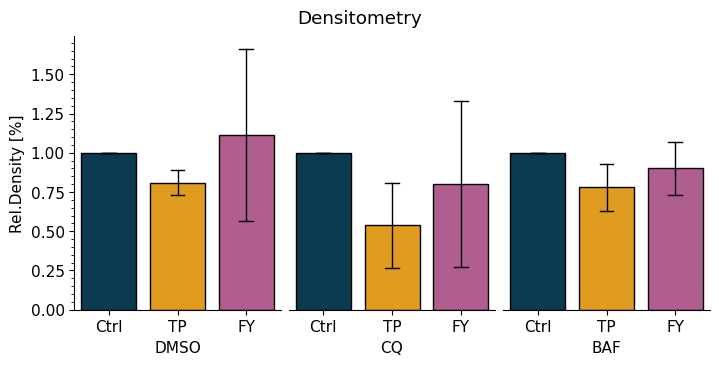

In [60]:
fig2,axs = plt.subplots(figsize = (3.54*2,3.54), ncols=3,sharey=True, sharex = True, layout = "constrained")
for i, g in enumerate(d.df["Group2"].unique()):
     ax = axs[i]
     ax = sns.barplot(data = d.df.loc[d.df["Group2"]==g, :],
                    x = "Group1",
                    y = "aSyn_norm_X",
                    hue = "Group1",
                    legend = False,
                    ax = ax,
                    palette = ["#003f5c",
                         "#ffa600",
                         "#bc5090"],
                    seed = 888,
                    alpha = 1,
                    capsize = 0.2,
                    err_kws = {
                         "linewidth": 1,
                         "color":"0"
                    })
     ax = sns.barplot(data = d.df.loc[d.df["Group2"]==g, :],
                    x = "Group1",
                    y = "aSyn_norm_X",
                    ax = ax,
                    color = "k",
                    fill = False,
                    linewidth = 1,
                    errorbar = None)
     ax = prettify(ax,
               title = "",
               x = (g,""),
               y = ("Rel.Density","%"))
     ax.set_xticklabels(["Ctrl","TP","FY"])
     ax.tick_params(axis = "x",direction = "out")
     ax.tick_params(axis = "y",which="both",direction = "out")
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)
fig2.suptitle("Densitometry")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
fig2.savefig("../../plots/Fig5_Dens.svg", format = "svg")

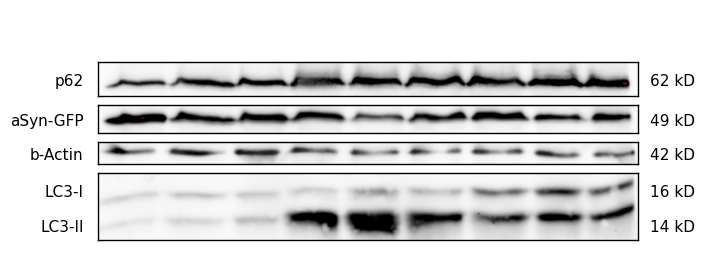

In [52]:
import skimage as ski
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import scipy.ndimage as ndi
from sklearn.cluster import KMeans



class WesternBlot:
    
    def __init__(self, border = 0.1,
                 linewidth = 1) -> None:
        self.linewidth = linewidth
        self.border = border
        self.x= 12+2*border
        self.y = border
        self.images = {}
        self.lines = []
        self.minor = None
        self.lane_params = pd.DataFrame(
            columns = [
                "height",
                "y_min",
                "weight",
                "protein"
            ]
        )
        self.label_params = {}
        pass
    
    def add_lane(self, 
                 image = None,
                 protein = "???",
                 weight = 0,
                 id = None):
        if type(image) == str:
            image = ski.io.imread(image)
        if id == None:
            id = len(self.images)
        self.images[id] = image
        height = (image.shape[0]/image.shape[1]) * (self.x - 2*self.border)
        self.lane_params.loc[id, "height"] = height
        self.lane_params.loc[id, "y_min"] = self.y
        self.lane_params.loc[id, "protein"] = protein
        if "kD" not in str(weight):
            weight = f"{str(weight)} kD"
        self.lane_params.loc[id, "weight"] = weight
        self.y += (height + 2*self.border)
        return self
    
    def extract_points(self, image):
        gray  = rgb2gray(image)
        t = gray < ski.filters.threshold_otsu(gray)
        labeled = ndi.label(t)[0]
        rp = (pd.DataFrame(data=ski.measure.regionprops_table(labeled, properties=("area","centroid")))
            .sort_values("area", ascending=False)
            .sort_values("centroid-1", ascending=True))
        return rp["centroid-1"].values/image.shape[1]
    
    def get_locations(self, n, id):
        points =np.concatenate([self.extract_points(image) for image in self.images.values()])
        return KMeans(n_clusters = n).fit(points.reshape(-1, 1)).cluster_centers_.ravel()
        
    
    def edit_multilevel_labels(self, labels):
        major = labels[0]
        for i in range(1,labels.shape[0]):
            fill_array = np.chararray(labels[0].shape).fill("\n")
            major = (major, fill_array)
            lines_rel = [(np.min(np.argwhere(labels[i] == x)),
                          np.max(np.argwhere(labels[i] == x)),
                          i)
                         for x in np.unique(labels[i])]
            for tup in lines_rel:
                pos = np.mean(np.array([tup[0],tup[1]]))
                
        return major
    
    def add_labels(self, labels,
                   locations = None,
                   id = 0):
        if locations == None:
            self.label_loc = np.sort(self.get_locations(len(labels), id)*(self.x - 2* self.border) + self.border)
        else: self.label_loc = locations
        self.labels = labels
        return self
    
    def plot_lane(self, ax, id, y_min, h):
        inset = ax.inset_axes([self.border, 
                                   y_min,
                                   self.x-2*self.border,
                                   h],
                                  transform = ax.transData)
        ex_in = (0, self.x-2*self.border, 0, h)
        inset.imshow(self.images[id],
                        extent=ex_in)
        inset.tick_params(bottom = False,
                            left = False,
                            labelbottom = False,
                            labelleft = False)
        for side in ["top","bottom","left","right"]:
            inset.spines[side].set_linewidth(self.linewidth)
        return ax
    
    def plot(self, ax = None
                ) -> plt.axis:
        ex = (0, self.x, 0, self.y-self.border)
        if ax == None:
            ax = plt.gca()
        ax.imshow(255 * np.ones([100,100,3],dtype=np.uint8),
                  extent=ex, origin="lower")
        for id, lane in self.lane_params.iterrows():
            h = lane["height"]
            y_min = lane["y_min"]
            ax = self.plot_lane(ax, id, y_min, h)
        ax.tick_params(which = "major", bottom = False,
                              left = False,
                              labelbottom = False,
                              labelleft = True,
                              labeltop = True)
        ax.tick_params(which = "minor",
                       left = False,
                        labelleft = False,
                        labelright = True)
        lp = self.lane_params.copy()
        lp["label_y"] = lp["y_min"] + lp["height"]/2
        ax.set_yticks(lp["label_y"].tolist(), lp["protein"].tolist())
        ax.set_yticks((lp["label_y"] + 0.001).tolist(), lp["weight"].tolist(), minor = True)
        ax.set_xticks(self.label_loc, self.labels,
                      fontsize = "large")
        for side in ["top","bottom","left","right"]:
            ax.spines[side].set_visible(False)
        return ax

im_folder = f"{folder}/5. Plasmid-mediated degradation does not get affected by Inhibition of Autophagy/WB/Img_Final/"

image1 = ski.io.imread(im_folder + "4_LC3.tif")
image3 = ski.io.imread(im_folder + "2_b-Actin.tif")
image4 = ski.io.imread(im_folder + "1_aSyn.tif")
image5 = ski.io.imread(im_folder + "0_p62.tif")
fig3, ax = plt.subplots(figsize = (3.54*2,3.54))
wb = (WesternBlot(border = 0.1)
      .add_lane(image = image1,
                protein ="LC3-I\n\nLC3-II",
                weight = "16 kD\n\n14 kD")
      .add_lane(image = image3,
                protein ="b-Actin",
                weight = 42)
      .add_lane(image = image4,
                protein ="aSyn-GFP",
                weight = 49)
      .add_lane(image = image5,
                protein ="p62",
                weight = 62)
      .add_labels([" \n "]*9)
      .plot(ax))

fig3.savefig("../../plots/Fig5_WB.svg", format = "svg",bbox_inches='tight')

In [53]:
d_p62 = result().read(f"{folder}/5. Plasmid-mediated degradation does not get affected by Inhibition of Autophagy/WB/Results.csv")
d_p62.df["p62"] = d_p62.df["p62"]/d_p62.df.loc[d_p62.df["Group2"]=="DMSO","p62"].mean()
d_p62.summarize(values = "p62",groups = ["Group1","Group2"]).round(2).head(10)

mean    sd  ci_lo  ci_hi  count
Group1 Group2                                 
X      DMSO    0.87  0.11   0.76   0.98      2
       CQ      1.32  0.24   1.07   1.56      2
       BAF     1.47  0.09   1.38   1.56      2
TP     DMSO    1.10  0.11   0.99   1.21      2
       CQ      1.33  0.15   1.18   1.48      2
       BAF     1.45  0.19   1.26   1.65      2
FY     DMSO    1.03  0.02   1.00   1.05      2
       CQ      1.58  0.09   1.49   1.66      2
       BAF     1.30  0.05   1.26   1.35      2

In [54]:
print(d_p62.summary)
d_p62.create_p_table(ci = True, control = 'DMSO', alternative = "greater").round(decimals=10).head(100)

                   mean        sd     ci_lo     ci_hi  count
Group1 Group2                                               
X      DMSO    0.870932  0.112539  0.758394  0.983471      2
       CQ      1.316394  0.241627  1.074767  1.558021      2
       BAF     1.470870  0.089223  1.381647  1.560093      2
TP     DMSO    1.101118  0.112918  0.988200  1.214036      2
       CQ      1.329848  0.150063  1.179784  1.479911      2
       BAF     1.453738  0.193485  1.260253  1.647224      2
FY     DMSO    1.027950  0.023622  1.004328  1.051571      2
       CQ      1.576148  0.085305  1.490843  1.661452      2
       BAF     1.303232  0.047398  1.255834  1.350630      2


/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:87: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:88: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:112: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  p_table.stack(p_table.index.names)


Group1 Group2       p  star
Group1 Group2                            
X      DMSO        X     CQ  0.0000  ****
       DMSO        X    BAF  0.0000  ****
TP     DMSO       TP     CQ  0.0643    ns
       DMSO       TP    BAF  0.0000  ****
FY     DMSO       FY     CQ  0.0000  ****
       DMSO       FY    BAF  0.0000  ****

/tmp/ipykernel_9558/39277075.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])
/tmp/ipykernel_9558/39277075.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])
/tmp/ipykernel_9558/39277075.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])


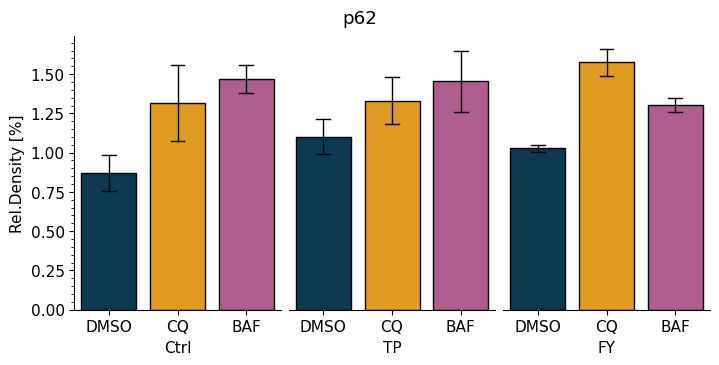

In [67]:
fig3,axs = plt.subplots(figsize = (3.54*2,3.54), ncols=3,sharey=True, sharex = True, layout = "constrained")
for i, g in enumerate(d_p62.df["Group1"].unique()):
     ax = axs[i]
     ax = sns.barplot(data = d_p62.df.loc[d.df["Group1"]==g, :],
                    x = "Group2",
                    y = "p62",
                    hue = "Group2",
                    legend = False,
                    ax = ax,
                    palette = ["#003f5c",
                         "#ffa600",
                         "#bc5090"],
                    seed = 888,
                    alpha = 1,
                    capsize = 0.2,
                    err_kws = {
                         "linewidth": 1,
                         "color":"0"
                    })
     ax = sns.barplot(data = d_p62.df.loc[d.df["Group1"]==g, :],
                    x = "Group2",
                    y = "p62",
                    ax = ax,
                    color = "k",
                    fill = False,
                    linewidth = 1,
                    errorbar = None)
     if g == 'X':
         g = 'Ctrl'
     ax = prettify(ax,
               title = "",
               x = (g,""),
               y = ("Rel.Density","%"))
     ax.set_xticklabels(["DMSO","CQ","BAF"])
     ax.tick_params(axis = "x",direction = "out")
     ax.tick_params(axis = "y",which="both",direction = "out")
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)
fig3.suptitle("p62")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
fig3.savefig("../../plots/Fig5_p62.svg", format = "svg")

In [56]:
d_lc3 = result().read(f"{folder}/5. Plasmid-mediated degradation does not get affected by Inhibition of Autophagy/WB/Results.csv")
d_lc3.df["LC3-II/LC3-I"] = d_lc3.df["LC3-II"]/d_lc3.df["LC3-I"]
d_lc3.summarize(values = "LC3-II/LC3-I",groups = ["Group1","Group2"]).round(2).head(10)

mean    sd  ci_lo  ci_hi  count
Group1 Group2                                 
X      DMSO    0.44  0.14   0.30   0.58      2
       CQ      2.23  0.80   1.43   3.03      2
       BAF     0.86  0.06   0.80   0.91      2
TP     DMSO    0.52  0.15   0.37   0.66      2
       CQ      1.76  0.37   1.39   2.13      2
       BAF     0.81  0.21   0.61   1.02      2
FY     DMSO    0.79  0.29   0.50   1.08      2
       CQ      1.93  0.20   1.73   2.13      2
       BAF     0.94  0.30   0.64   1.25      2

In [57]:
d_lc3.create_p_table(ci = True, control = 'DMSO', alternative = "greater").round(decimals=4).head(100)

/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:87: PerformanceWarning: indexing past lexsort depth may impact performance.
  control_v = data[pair[0]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:88: PerformanceWarning: indexing past lexsort depth may impact performance.
  treatment_v = data.loc[pair[1]].values
/home/raphael/projects/mdthesis/notebooks/Figure creation/analyze_data.py:112: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  p_table.stack(p_table.index.names)


Group1 Group2       p  star
Group1 Group2                            
X      DMSO        X     CQ  0.0000  ****
       DMSO        X    BAF  0.0000  ****
TP     DMSO       TP     CQ  0.0000  ****
       DMSO       TP    BAF  0.0599    ns
FY     DMSO       FY     CQ  0.0000  ****
       DMSO       FY    BAF  0.3088    ns

/tmp/ipykernel_9558/2532658508.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])
/tmp/ipykernel_9558/2532658508.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])
/tmp/ipykernel_9558/2532658508.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["DMSO","CQ","BAF"])


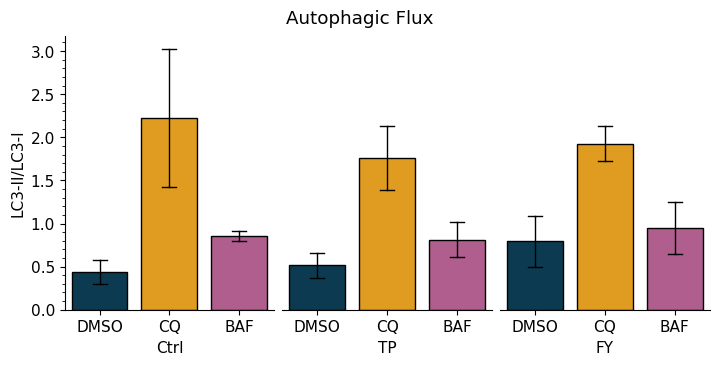

In [64]:
fig4,axs = plt.subplots(figsize = (3.54*2,3.54), ncols=3,sharey=True, sharex = True, layout = "constrained")
for i, g in enumerate(d_lc3.df["Group1"].unique()):
     ax = axs[i]
     ax = sns.barplot(data = d_lc3.df.loc[d.df["Group1"]==g, :],
                    x = "Group2",
                    y = "LC3-II/LC3-I",
                    hue = "Group2",
                    legend = False,
                    ax = ax,
                    palette = ["#003f5c",
                         "#ffa600",
                         "#bc5090"],
                    seed = 888,
                    alpha = 1,
                    capsize = 0.2,
                    err_kws = {
                         "linewidth": 1,
                         "color":"0"
                    })
     ax = sns.barplot(data = d_lc3.df.loc[d.df["Group1"]==g, :],
                    x = "Group2",
                    y = "LC3-II/LC3-I",
                    ax = ax,
                    color = "k",
                    fill = False,
                    linewidth = 1,
                    errorbar = None)
     if g == 'X':
         g = 'Ctrl'
     ax = prettify(ax,
               title = "",
               x = (g,""),
               y = ("LC3-II/LC3-I",""))
     ax.set_xticklabels(["DMSO","CQ","BAF"])
     ax.tick_params(axis = "x",direction = "out")
     ax.tick_params(axis = "y",which="both",direction = "out")
     if i > 0:
        ax.spines[['left']].set_visible(False)
        ax.tick_params(which = "both", left = False)
fig4.suptitle("Autophagic Flux")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
fig4.savefig("../../plots/Fig5_LC3.svg", format = "svg")

(0.0, 2.8)

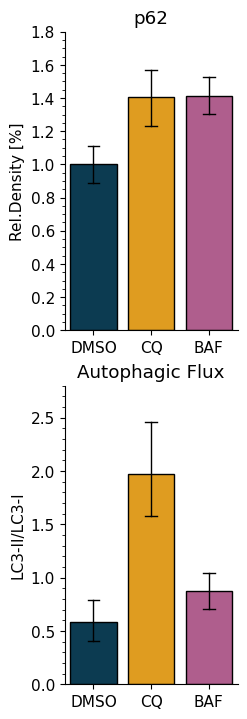

In [59]:
fig3,axs = plt.subplots(figsize = (3.54*2/3,3.54*2), nrows=2, layout = "constrained")
ax = axs[0]
ax = sns.barplot(data = d_p62.df,
               x = "Group2",
               y = "p62",
               hue = "Group2",
               legend = False,
               ax = ax,
               palette = ["#003f5c",
                    "#ffa600",
                    "#bc5090"],
               seed = 888,
               alpha = 1,
               capsize = 0.2,
               err_kws = {
                    "linewidth": 1,
                    "color":"0"
               })
ax = sns.barplot(data = d_p62.df,
               x = "Group2",
               y = "p62",
               ax = ax,
               color = "k",
               fill = False,
               linewidth = 1,
               errorbar = None)
ax = prettify(ax,
          title = "p62",
          x = ("",""),
          y = ("Rel.Density","%"))
# ax.set_xticklabels(["Ctrl","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
ax.set_ylim(0,1.8)

ax = axs[1]
ax = sns.barplot(data = d_lc3.df,
               x = "Group2",
               y = "LC3-II/LC3-I",
               hue = "Group2",
               legend = False,
               ax = ax,
               palette = ["#003f5c",
                    "#ffa600",
                    "#bc5090"],
               seed = 888,
               alpha = 1,
               capsize = 0.2,
               err_kws = {
                    "linewidth": 1,
                    "color":"0"
               })
ax = sns.barplot(data = d_lc3.df,
               x = "Group2",
               y = "LC3-II/LC3-I",
               ax = ax,
               color = "k",
               fill = False,
               linewidth = 1,
               errorbar = None)
ax = prettify(ax,
          title = "Autophagic Flux",
          x = ("",""),
          y = ("LC3-II/LC3-I",""))
# ax.set_xticklabels(["Ctrl","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
ax.set_ylim(0,2.8)

# fig2.suptitle("Densitometry")
# fig2.subplots_adjust(wspace=0.2, hspace=0)
#fig3.savefig("Fig5_extra.svg", format = "svg")